需要注意的是resize、warpAffine等几何变换函数的第三个参数dsize=(width,height)=(列数，行数)。

#### 缩放

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

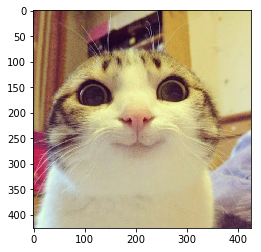

In [2]:
img=cv2.imread("E:\cat.jpg") #bgr模式，默认
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#转成RGB
plt.imshow(img2)

In [3]:
img2.shape

(426, 426, 3)

| interpolation（插值方法） | 含义 | 
| :-: | :- | 
| INTER_LINEAR | 双线性插值 (默认值) | 
| INTER_NN | 最近邻插值 | 
| INTER_AREA | 使用像素关系重采样，当图像缩小时候，该方法可以避免波纹出现。当图像放大时，类似于 INTER_NN 方法。 |
| INTER_CUBIC | 立方插值 | 

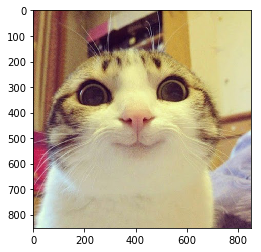

In [4]:
res1=cv2.resize(img2,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
plt.imshow(res1)

In [5]:
res1.shape

(852, 852, 3)

#### 平移

借助矩阵：
$M=\begin{bmatrix}
 1 & 0 & t_x\\ 
 0 & 1 & t_y
\end{bmatrix}_{2\times 3}$可实现在（x，y）方向上的偏移。

对于仿射函数cv2.warpAffine，原二维坐标$X=\begin{bmatrix} x \\  y \end{bmatrix}$ 变换后为
$T_{2\times 1}=M_{2\times 3} \cdot[x,y,1]^T=\begin{bmatrix} x' \\  y' \end{bmatrix}$

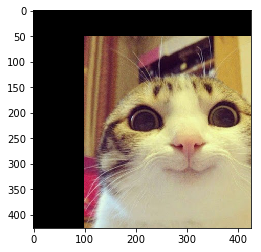

In [6]:
import numpy as np
M=np.float32([[1,0,100],[0,1,50]])
res2 = cv2.warpAffine(img2,M,(img.shape[1],img.shape[0]))# x方向偏移100，y方向偏移50；Affine：仿射
plt.imshow(res2)

In [7]:
res2.shape

(426, 426, 3)

#### 旋转

In [8]:
rows,cols = img2.shape[:2]

[[   1.06066017    1.06066017 -238.84123318]
 [  -1.06066017    1.06066017  213.        ]]


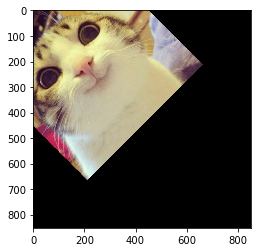

In [9]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1.5) #定义变换矩阵，中心位置，45度，放大1.5倍
print(M)
res3 = cv2.warpAffine(img2,M,(cols*2,rows*2)) #仿射变换,参见上文平移描述
plt.imshow(res3)

#### 仿射变换

实现效果为原来平行的线仍然平行，因此可以用三个点来构造变换矩阵。

(<matplotlib.axes._subplots.AxesSubplot at 0x247b150edd8>,
 <matplotlib.text.Text at 0x247b2d25908>)

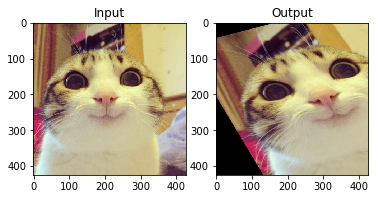

In [10]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

res4 = cv2.warpAffine(img2,M,(cols,rows))

plt.subplot(121),plt.imshow(img2),plt.title('Input')
plt.subplot(122),plt.imshow(res4),plt.title('Output')

#### 透视变换

相对仿射变换处理2D平面，透视变换主要处理3D平面。其基于4个顶点构造变换矩阵。其显示效果有局部拉近拉远作用。

参考链接：[知乎：OpenCV图像变换(仿射变换与透视变换)](https://zhuanlan.zhihu.com/p/24591720)

(<matplotlib.axes._subplots.AxesSubplot at 0x247b2c8bb70>,
 <matplotlib.text.Text at 0x247b2e38da0>)

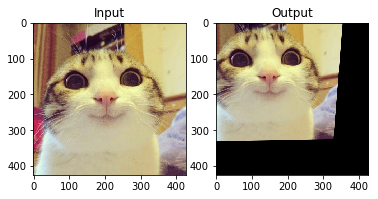

In [11]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

res5 = cv2.warpPerspective(img2,M,(cols,rows))

plt.subplot(121),plt.imshow(img2),plt.title('Input')
plt.subplot(122),plt.imshow(res5),plt.title('Output')